In [1282]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# pd.set_option('max_colwidth', None) # show full width of showing cols
# pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
pd.options.display.max_seq_items = 200
pd.options.display.max_rows = 200


In [1283]:
dfChurn = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(dfChurn.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [1284]:
dfChurn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [1285]:
dfChurn.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


<Axes: xlabel='arpu_6', ylabel='Density'>

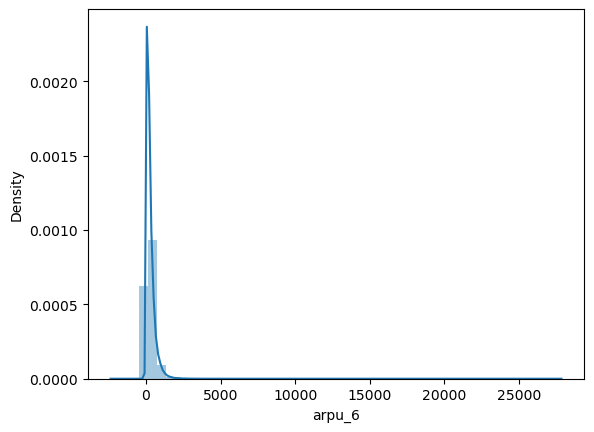

In [1286]:
sns.distplot(churn['arpu_6'])

In [1287]:
# create column name list by types of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


### Drop columns - drop the id and date columns

In [1288]:
print("Shape before dropping: ", churn.shape)
dfChurn = dfChurn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 172)


### Handling Missing Values

#### Imputing zero values

In [1289]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

dfChurn[zero_impute] = dfChurn[zero_impute].fillna(0)

#### Impute Categorical values

In [1290]:
dfChurn[num_cols] = dfChurn[num_cols].fillna(0)

In [1291]:
dfChurn[cat_cols] = dfChurn[cat_cols].fillna(-1)


In [1292]:
dfChurn.isna().sum()*100/dfChurn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

#### Removing columns with more than threshold limit

In [1293]:
missing = dfChurn.isnull().sum()*100/dfChurn.shape[0]

missing.sort_values(ascending=False)

loc_og_t2o_mou        0.0
std_ic_t2o_mou_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
total_rech_amt_6      0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
spl_ic_mou_6          0.0
std_ic_t2o_mou_8      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
spl_ic_mou_7          0.0
total_rech_num_6      0.0
spl_ic_mou_8          0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8 

In [1294]:
MISSING_THRESHOLD = 70

columns_greaterthan_threshold = missing[missing > MISSING_THRESHOLD].index

(columns_greaterthan_threshold)

Index([], dtype='object')

In [1295]:
dfChurn = dfChurn.drop(columns_greaterthan_threshold, axis=1)

dfChurn.shape

(69999, 161)

### Filter top value customers - filtering for customers above the 70th percentile of recharge value

In [1296]:
dfChurn['total_data_rech_6'] = dfChurn.total_rech_data_6 * dfChurn.av_rech_amt_data_6
dfChurn['total_data_rech_7'] = dfChurn.total_rech_data_7 * dfChurn.av_rech_amt_data_7

dfChurn['amt_data_6'] = dfChurn.total_rech_amt_6 + dfChurn.total_data_rech_6
dfChurn['amt_data_7'] = dfChurn.total_rech_amt_7 + dfChurn.total_data_rech_7

dfChurn['av_amt_data_6_7'] = (dfChurn.amt_data_6 + dfChurn.amt_data_7)/2

dfChurn['av_amt_data_6_7']

0          71.0
1         145.0
2          95.0
3         200.0
4        1494.0
          ...  
69994     696.0
69995     256.5
69996     438.0
69997     531.0
69998     223.0
Name: av_amt_data_6_7, Length: 69999, dtype: float64

In [1297]:
Quantile_70_Amount = dfChurn.av_amt_data_6_7.quantile(0.7)

print("Recharge amount at 70th percentile: {0}".format(Quantile_70_Amount))


Recharge amount at 70th percentile: 477.5


In [1298]:
churn_filtered = dfChurn.loc[dfChurn.av_amt_data_6_7 >= dfChurn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(21013, 166)

In [1299]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(21013, 161)

### EDA

In [1300]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(var1, var2)

In [1301]:
dfChurn['churn_probability'] = dfChurn['churn_probability'].astype('category')

print("Churn Ratio:")
print(dfChurn.churn_probability.value_counts()*100/dfChurn.shape[0])

Churn Ratio:
0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


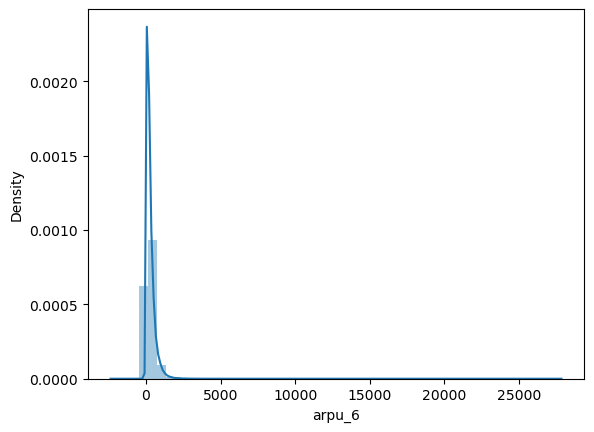

In [1302]:
univariate(churn.arpu_6)

count    69297.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


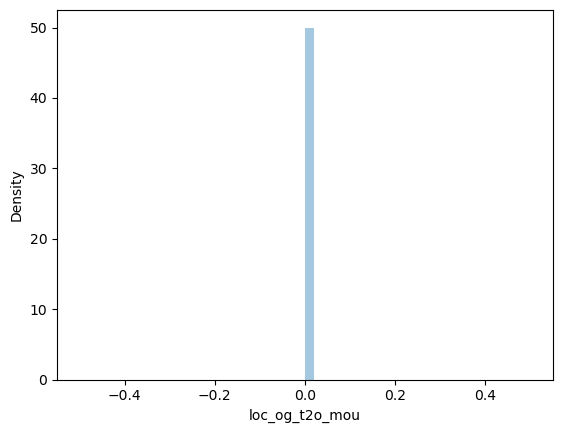

In [1303]:
univariate(churn.loc_og_t2o_mou)

count    69297.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


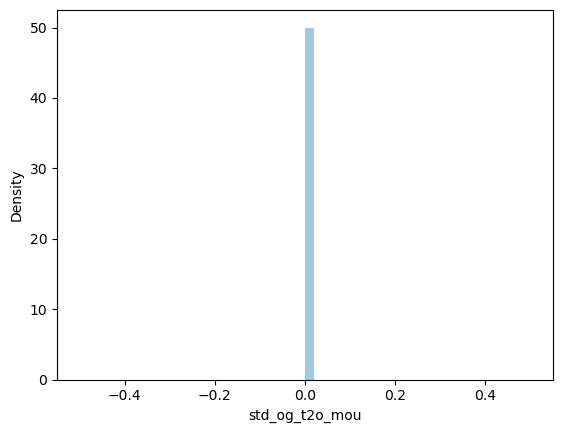

In [1304]:
univariate(churn.std_og_t2o_mou)

count    66296.000000
mean       132.978257
std        311.896596
min          0.000000
25%          6.410000
50%         32.100000
75%        115.060000
max      10752.560000
Name: onnet_mou_8, dtype: float64


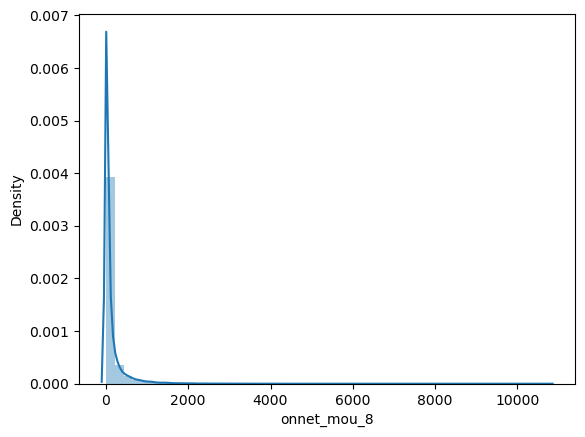

In [1305]:
univariate(churn.onnet_mou_8)

### Modelling - PCA 

#### Handling Outliers

In [1306]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [1307]:
cap_cols = num_cols

cap_cols.remove('churn_probability')

cap_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [1308]:
churn_filtered[cap_cols] = churn_filtered[cap_cols].apply(cap_outliers, axis = 0)

churn_filtered.shape

(21013, 161)

In [1309]:
# change churn to numeric
churn_filtered['churn_probability'] = pd.to_numeric(churn_filtered['churn_probability'])

In [1310]:
X = churn_filtered.drop("churn_probability", axis = 1)
y = churn_filtered['churn_probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [1311]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759, 160)
(15759,)
(5254, 160)
(5254,)


In [1312]:
X_train.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
13528,0.0,0.0,0.0,559.135,508.842,553.107,597.83,448.53,594.29,149.26,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,2984.0,0.00,0.0,0.00
7183,0.0,0.0,0.0,381.035,660.847,199.111,364.79,617.33,51.71,124.69,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,1101.0,0.00,0.0,0.00
14666,0.0,0.0,0.0,276.101,518.185,267.706,84.68,117.61,87.43,552.86,...,1.0,1.0,1.0,1.0,1.0,1.0,2779.0,197.37,288.6,185.75
17922,0.0,0.0,0.0,413.743,476.101,409.262,636.51,728.43,700.23,177.04,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,369.0,0.00,0.0,0.00
5165,0.0,0.0,0.0,497.504,444.456,293.627,739.41,185.51,66.08,481.24,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,969.0,0.00,0.0,0.00


#### PCA

In [1313]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [1314]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [1315]:
pcastep = pca.named_steps['pca']

print(pd.DataFrame(np.round(pcastep.explained_variance_ratio_.cumsum(), 4)*100))


          0
0     13.73
1     24.92
2     31.92
3     37.26
4     41.30
5     44.22
6     47.02
7     49.49
8     51.83
9     54.07
10    56.23
11    58.07
12    59.87
13    61.45
14    63.00
15    64.49
16    65.91
17    67.33
18    68.72
19    69.97
20    71.12
21    72.10
22    73.05
23    73.96
24    74.83
25    75.69
26    76.53
27    77.34
28    78.14
29    78.91
30    79.61
31    80.29
32    80.96
33    81.58
34    82.18
35    82.75
36    83.31
37    83.86
38    84.39
39    84.91
40    85.43
41    85.93
42    86.41
43    86.89
44    87.35
45    87.77
46    88.18
47    88.59
48    88.98
49    89.36
50    89.74
51    90.11
52    90.47
53    90.80
54    91.12
55    91.44
56    91.75
57    92.04
58    92.33
59    92.60
60    92.87
61    93.12
62    93.37
63    93.60
64    93.83
65    94.05
66    94.27
67    94.48
68    94.68
69    94.88
70    95.08
71    95.27
72    95.47
73    95.65
74    95.83
75    96.01
76    96.18
77    96.35
78    96.52
79    96.69
80    96.85
81    97.01
82  

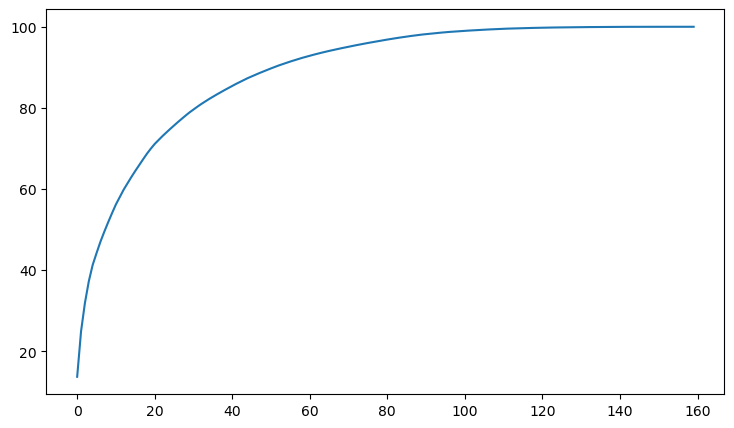

In [1316]:
features = range(pcastep.n_components_)
cumulative_variance = np.round(np.cumsum(pcastep.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

plt.show()

#### Logistic Regression with PCA Components

In [1317]:
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=60)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
        
pipeline = Pipeline(steps)

In [1318]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [1319]:
pipeline.score(X_train, y_train)

0.8249888952344692

In [1320]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3939  880]
 [  84  351]]
Sensitivity: 	0.81
Specificity: 	0.82
AUC:    	 0.89


#### GridSearch using Logistic Regression

In [1324]:
weights = np.linspace(0.0,0.99,5)

wts = [{0:x, 1:1.0-x} for x in weights]

In [1325]:
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__class_weight': [{0:x, 1:1.0-x} for x in weights],  'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [1326]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__class_weight': [{0: 0.0, 1: 1.0},
                                                    {0: 0.2475, 1: 0.7525},
                                                    {0: 0.495, 1: 0.505},
                                                    {0: 0.7424999999999999,
                                                     1: 0.25750000000000006},
                                                    {0: 0.99,
                                                     1: 0.010000000000000009}],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [1327]:
results = pd.DataFrame(model.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__class_weight,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.647832,0.056400,0.000000,0.000000,"{0: 0.0, 1: 1.0}",l1,60,"{'logistic__class_weight': {0: 0.0, 1: 1.0}, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
1,0.745161,0.074979,0.000000,0.000000,"{0: 0.0, 1: 1.0}",l1,80,"{'logistic__class_weight': {0: 0.0, 1: 1.0}, 'logistic__penalty': 'l1', 'pca__n_components': 80}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
2,0.730063,0.078456,0.027690,0.008921,"{0: 0.0, 1: 1.0}",l2,60,"{'logistic__class_weight': {0: 0.0, 1: 1.0}, 'logistic__penalty': 'l2', 'pca__n_components': 60}",0.610355,0.261632,0.562870,0.49985,0.446792,0.476300,0.120808,9
3,1.064825,0.210223,0.036508,0.007435,"{0: 0.0, 1: 1.0}",l2,80,"{'logistic__class_weight': {0: 0.0, 1: 1.0}, 'logistic__penalty': 'l2', 'pca__n_components': 80}",0.243106,0.569757,0.231929,0.74264,0.504753,0.458437,0.196460,10
4,0.672406,0.107132,0.000000,0.000000,"{0: 0.2475, 1: 0.7525}",l1,60,"{'logistic__class_weight': {0: 0.2475, 1: 0.7525}, 'logistic__penalty': 'l1', 'pca__n_components': 60}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [1328]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8970102525567167
Best hyperparameters:  {'logistic__class_weight': {0: 0.2475, 1: 0.7525}, 'logistic__penalty': 'l2', 'pca__n_components': 80}


#### Best Model after GridSearch

In [1329]:
bestModel = model.best_estimator_

In [1330]:
bestModel.score(X_test, y_test)

0.9114960030452989

In [1331]:
# predict churn on test data
y_pred = bestModel.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4517  302]
 [ 163  272]]
Sensitivity: 	0.63
Specificity: 	0.94
AUC:    	 0.89


In [1332]:
precision_score(y_test, y_pred)

0.4738675958188153

In [1333]:
recall_score(y_test, y_pred)

0.6252873563218391

#### Submission File

In [1334]:
unseen.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [1335]:
cols = X_train.columns

In [1336]:
unseen['churn_probability'] = 0

In [1337]:
## Clean unseen data

unseen[cat_cols] = unseen[cat_cols].fillna(-1)

unseen[num_cols] = unseen[num_cols].fillna(0)

In [1338]:
unseen['churn_probability'] = bestModel.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head(10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
5,70004,0
6,70005,0
7,70006,0
8,70007,0
9,70008,0


In [1339]:
output.to_csv('chaitanya_submission_pca_lr_21dec.csv',index=False)

### Building a model for Feature Selection

In [1340]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})


# hyperparameter space
params = {'penalty': ['l1', 'l2'], 'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
gsModel = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='f1', n_jobs=-1, verbose=1)

gsModel.fit(X_train, y_train)

md = gsModel.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [1341]:
params = pd.DataFrame()

params['features'] = md.feature_names_in_
params['coef'] = md.coef_[0]
params['coef_abs'] = abs(md.coef_[0])

params.sort_values(ascending=False, by='coef_abs').head(30)

,features,coef,coef_abs
125,av_rech_amt_data_8,-0.006756,0.006756
101,total_rech_num_8,-0.005338,0.005338
63,loc_ic_t2m_mou_6,0.004754,0.004754
71,loc_ic_mou_8,-0.004379,0.004379
65,loc_ic_t2m_mou_8,-0.004271,0.004271
17,roam_og_mou_8,0.004131,0.004131
47,std_og_mou_8,0.003497,0.003497
110,last_day_rch_amt_8,-0.003261,0.003261
134,arpu_3g_8,0.003253,0.003253
35,std_og_t2t_mou_8,-0.003155,0.003155


The top 30 important features are:

av_rech_amt_data_8,
total_rech_num_8,
loc_ic_t2m_mou_6,
loc_ic_mou_8,
loc_ic_t2m_mou_8,
roam_og_mou_8,
std_og_mou_8,
spl_og_mou_8,
arpu_3g_8,
last_day_rch_amt_8,
isd_ic_mou_7,
std_og_t2t_mou_8,
loc_og_mou_8,
isd_og_mou_6,
std_ic_t2t_mou_8,
arpu_2g_7,
std_ic_mou_8,
loc_ic_t2t_mou_6,
total_rech_num_7,
loc_ic_mou_6,
arpu_2g_6,
spl_og_mou_6,
loc_ic_t2t_mou_7,
roam_og_mou_7,
std_ic_t2t_mou_7,
loc_ic_t2f_mou_7,
total_ic_mou_8,
std_og_t2m_mou_8,
isd_ic_mou_8,
isd_og_mou_7

<hr>




